In [172]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [173]:
rawData = pd.read_csv('google_video.csv')

In [174]:
print(rawData)
print("(rows,columns):",rawData.shape)

                                          Flow ID           Src IP  Src Port  \
0       131.202.240.87-173.194.123.110-2536-443-6   131.202.240.87      2536   
1       173.194.204.189-131.202.240.87-443-2579-6  173.194.204.189       443   
2        131.202.240.87-216.58.219.206-2632-443-6   131.202.240.87      2632   
3        131.202.240.87-216.58.219.238-2611-443-6   131.202.240.87      2611   
4     131.202.240.150-64.233.171.188-37692-5228-6  131.202.240.150     37692   
...                                           ...              ...       ...   
1711    131.202.240.150-131.202.244.5-48206-53-17  131.202.240.150     48206   
1712    131.202.240.150-131.202.244.5-41495-53-17  131.202.240.150     41495   
1713    131.202.240.150-131.202.244.5-14600-53-17  131.202.240.150     14600   
1714    131.202.240.150-131.202.244.5-55586-53-17  131.202.240.150     55586   
1715   131.202.240.150-216.58.219.238-47774-443-6  131.202.240.150     47774   

               Dst IP  Dst Port  Protoc

In [200]:
# Get np array by columns
X = rawData.iloc[:,:86].values
Y = rawData.iloc[:,86].values.reshape((1716,1))

# Total length of flow in both direction
X_total_length_flow = np.array(rawData.loc[:,['TotLen Fwd Pkts','TotLen Bwd Pkts','Category']])
# Category and AppProtocol
X_category_AppProtocol = np.array(rawData.loc[:,['Category','App_protocol']])

print(X_category_AppProtocol[np.where(X_category_AppProtocol[:,0] == 'Web')])

[['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'QUIC']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' 'TLS']
 ['Web' '

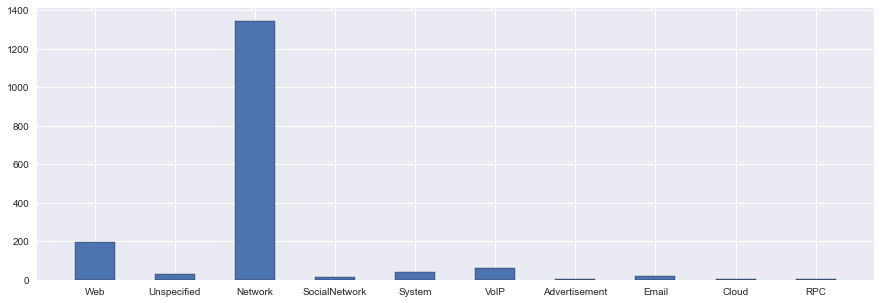

In [167]:
# plot category
plt.style.use('seaborn')

X_category = X_category_AppProtocol[:,0]
X_category = X_category.reshape(X_category.shape[0],1)
x_category_labels = np.unique(X_category)

fig, ax = plt.subplots(figsize=(15,5))

ax.hist(X_category,rwidth=0.5,bins=np.arange(-0.5,len(x_category_labels)),edgecolor='black')

plt.show()

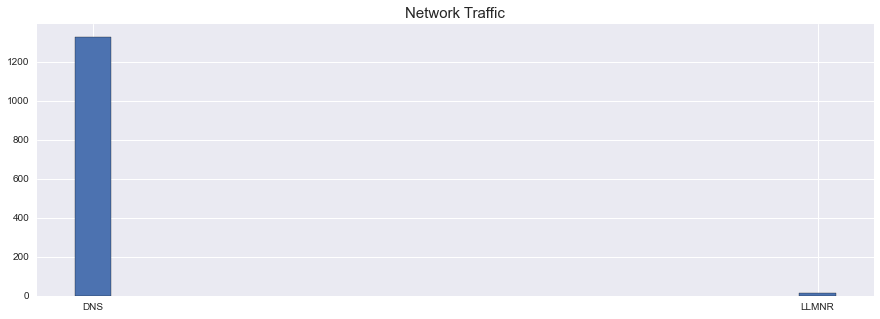

In [168]:
# plot what app protocols the network traffic use
x_network_appProtocol = X_category_AppProtocol[np.where(X_category_AppProtocol[:,0] == 'Network')]
x_network_appProtocol = x_network_appProtocol[:,1]
x_network_appProtocol = x_network_appProtocol.reshape(x_network_appProtocol.shape[0],1)
x_network_app_labels = np.unique(x_network_appProtocol)



fig, ax = plt.subplots(figsize=(15,5))

ax.hist(x_network_appProtocol,rwidth=0.05,bins=np.arange(-0.5,len(x_network_app_labels)),edgecolor='black')
ax.set_title("Network Traffic",fontsize=15)
plt.show()

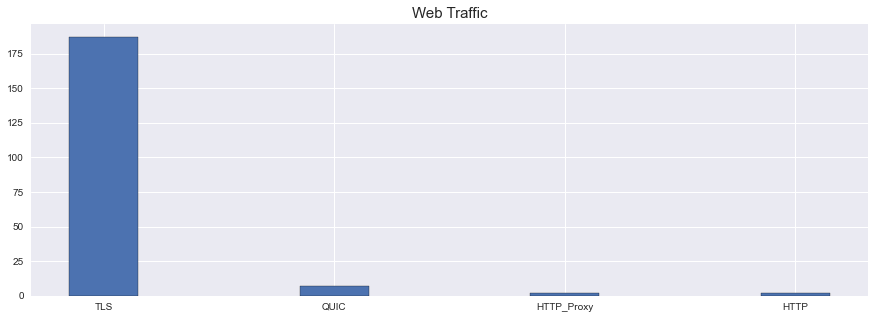

In [169]:
# plot what app protocols the web traffic use
x_network_appProtocol = X_category_AppProtocol[np.where(X_category_AppProtocol[:,0] == 'Web')]
x_network_appProtocol = x_network_appProtocol[:,1]
x_network_appProtocol = x_network_appProtocol.reshape(x_network_appProtocol.shape[0],1)
x_network_app_labels = np.unique(x_network_appProtocol)


fig, ax = plt.subplots(figsize=(15,5))

ax.hist(x_network_appProtocol,rwidth=0.3,bins=np.arange(-0.5,len(x_network_app_labels)),edgecolor='black')
ax.set_title("Web Traffic",fontsize=15)
plt.show()

[[37.0 213.0 'Network']
 [37.0 213.0 'Network']
 [37.0 213.0 'Network']
 ...
 [37.0 213.0 'Network']
 [37.0 213.0 'Network']
 [37.0 213.0 'Network']]


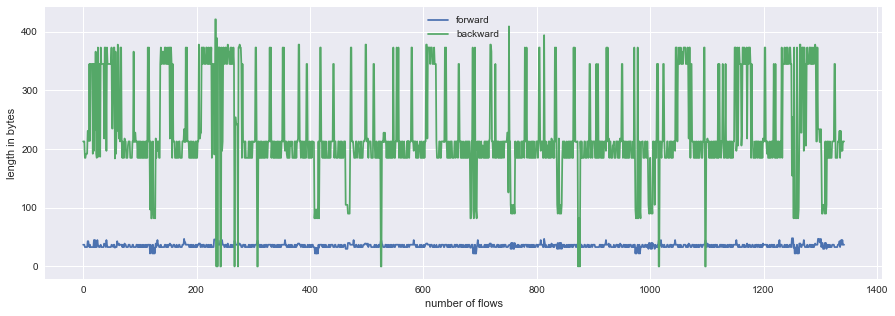

In [197]:
# plot total length of forward and backward flow in network traffic
X_network_length_flow = X_total_length_flow[np.where(X_total_length_flow[:,2] == 'Network')]
print(X_network_length_flow)
flow = ['forward','backward']

fig, ax = plt.subplots(figsize=(15,5))
for i in range(2):
    plt.plot(X_network_length_flow[:,i],label= flow[i])
    
plt.ylabel('length in bytes')
plt.xlabel('number of flows')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

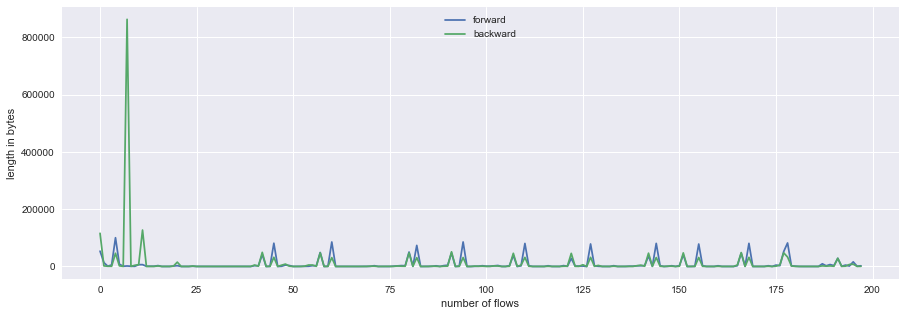

In [198]:
# plot total length of forward and backward flow in web traffic
X_web_length_flow = X_total_length_flow[np.where(X_total_length_flow[:,2] == 'Web')]
fig, ax = plt.subplots(figsize=(15,5))
for i in range(2):
    plt.plot(X_web_length_flow[:,i],label= flow[i])
    
plt.ylabel('length in bytes')
plt.xlabel('number of flows')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()